<a href="https://colab.research.google.com/github/uttarakhatri/Sleep-stage-EEG-transitions/blob/main/RN_analysis_sub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Run this

In [ ]:
#installing packages
#!pip install git+https://github.com/manu-mannattil/nolitsa.git
#from nolitsa import data, dimension
!echo "deb http://downloads.skewed.de/apt bionic main" >> /etc/apt/sources.list
!apt-key adv --keyserver keys.openpgp.org --recv-key 612DEFB798507F25
!apt-get update
!apt-get install python3-graph-tool python3-cairo python3-matplotlib
import graph_tool.all as gt
#!pip install pyunicorn
#!rm /usr/local/lib/python3.6/dist-packages/pyunicorn/__init__.py
#import pyunicorn as pyu

#importing modules
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.spatial import distance
import pandas as pd
import collections
from mpl_toolkits import mplot3d
%matplotlib inline
import seaborn as sns

Executing: /tmp/apt-key-gpghome.fwcR0dFUs4/gpg.1.sh --keyserver keys.openpgp.org --recv-key 612DEFB798507F25
gpg: key 612DEFB798507F25: "Tiago de Paula Peixoto <tiago@skewed.de>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://downloads.skewed.de/apt bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 http://archive

Run this

In [ ]:
import numpy as np
stop_stages= np.load('/content/drive/MyDrive/sleep/ISRUC_sleep_dataset/random_epochs/8_1_random_60_epochs.npy')
sub7_w_stop= stop_stages[4]
sub7_w_start= sub7_w_stop-1
print(sub7_w_start)
print(sub7_w_stop)

[205.  32. 245. 311. 257. 320. 200. 156. 287. 222. 225. 575.  20. 239.
 744.  12.  61.   0. 160. 271. 897. 307.   4. 186. 318. 243. 131. 135.
 292. 288. 208. 251. 137.  17. 315. 216. 773. 759. 484. 313. 322. 109.
 136. 935.  18.  73. 195.  59. 210. 325. 221. 285. 304. 143.  58. 739.
 130. 764. 196. 125.]
[206.  33. 246. 312. 258. 321. 201. 157. 288. 223. 226. 576.  21. 240.
 745.  13.  62.   1. 161. 272. 898. 308.   5. 187. 319. 244. 132. 136.
 293. 289. 209. 252. 138.  18. 316. 217. 774. 760. 485. 314. 323. 110.
 137. 936.  19.  74. 196.  60. 211. 326. 222. 286. 305. 144.  59. 740.
 131. 765. 197. 126.]


calculting network measures


run this

In [ ]:
rnm = np.zeros((6,3,20))
def analysis(sub,start):
  for channel in range(7,8):
    for g in range(0,1):
      #for each channel, each stage, RN analysis code
      #embedding
      print((channel,g))
      tau=0
      da= sub[channel][int(start[g]*6000):int((start[g]+1)*6000)]
      da= (da-min(da))/(max(da)-min(da))
      rel = sm.tsa.acf(da, nlags=75, fft=True)
      y= np.arange(0,75,1.0)
      for k in range(len(y)):
        if (rel[k]-(np.e**(-1)))<10**(-6):
          tau=k
          break
      le=int(len(da)-6*tau)
      dim= np.zeros((6,le))
      for i in range(6):
        for j in range(le):
            dim[i][j]=(da[j+i*tau])
      tra=dim.transpose()
      gc=0
      rec_matrix= np.zeros((le,le))
      rec_matrix = (distance.cdist(tra,tra,'euclidean')<=0.20) -(np.identity(le))
      plt.imshow(rec_matrix, cmap='Greys', origin='lower')
      plt.show()
  #     g1= gt.Graph(directed=False)
  #     g1.add_edge_list(np.transpose(np.transpose(rec_matrix).nonzero()))
  #     l=gt.label_largest_component(g1)
  #     u = gt.GraphView(g1, vfilt = l)
  #     gc=gt.Graph(u, prune=True)
  #     dist_lc = gt.shortest_distance(u)
  #     ave_path_length_lc = sum([sum(i) for i in dist_lc])/(u.num_vertices()**2-u.num_vertices())
  #     unum=u.num_vertices()
  #     ld_lc= (u.num_edges())/(unum*(unum-1))
  #     cc= gt.vertex_average(u, gt.local_clustering(u))
  #     #trans=gt.global_clustering(gc)
  #     #assor= gt.assortativity(gc, 'total')
  #     rnm[channel-3][0][g]= ld_lc
  #     rnm[channel-3][1][g]= cc[0]
  #     rnm[channel-3][2][g]= ave_path_length_lc
  #     #rnm[channel-3][3][g]= trans[0]
  #     #rnm[channel-3][3][g]= assor[0]
  #     print((ave_path_length_lc, cc, ld_lc))
  # np.save('/content/drive/My Drive/sleep/ISRUC_sleep_dataset/10/random_20_epochs/sub10_rnm_random_20_epochs_W_7.npy', rnm)

Run this

(7, 0)


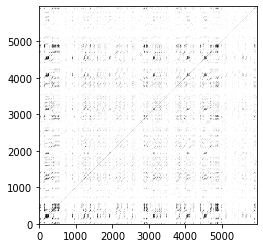

(7, 0)


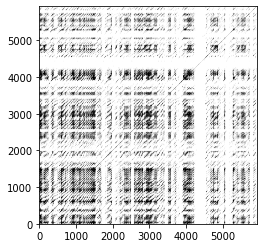

(7, 0)


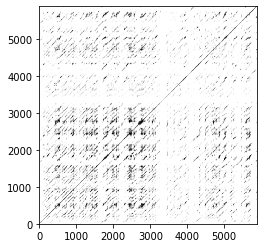

(7, 0)


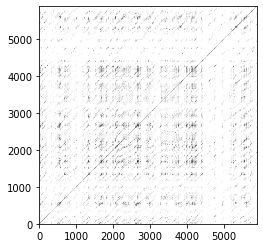

(7, 0)


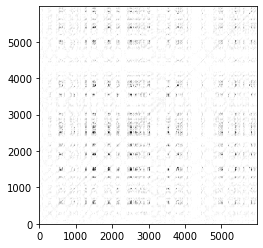

In [ ]:
sub1= np.load('/content/drive/My Drive/sleep/ISRUC_sleep_dataset/ICA/8_ica_pc.npy')
analysis(sub1,stop_stages[0]-1)
analysis(sub1,stop_stages[1]-1)
analysis(sub1,stop_stages[2]-1)
analysis(sub1,stop_stages[3]-1)
analysis(sub1,stop_stages[4]-1)

In [ ]:
print(stop_stages[4]-1)

[582.  53. 806. 961. 864. 568. 425. 951. 719. 746.  13. 803.   6. 119.
   0. 503. 943.   2. 542. 805. 380. 385. 433. 962. 286. 378. 942. 131.
   4. 525. 351. 668. 569. 944. 532. 284. 867. 529. 718. 118. 869. 959.
 697. 868. 967. 283.  15. 317. 530. 353. 945. 522. 215. 777. 545. 130.
 574. 778. 126. 947.]


In [ ]:
 np.save('/content/drive/My Drive/sleep/ISRUC_sleep_dataset/7/random_20_epochs/sub7_rnm_random_20_epochs.npy', rnm)
 print(rnm)

In [ ]:
sub1= np.load('/content/drive/My Drive/sleep/ISRUC_sleep_dataset/7/7_ica_pc.npy')
rnthr(sub1,sub7_w_start[:20])

In [ ]:
np.save('/content/drive/My Drive/sleep/ISRUC_sleep_dataset/72/20feb_nm_6dim.npy', rnm)

Plotting FFT

In [ ]:
from scipy.fft import fft, fftfreq
def fftf(sub,start):
  for channel in range(3,9):
    for g in range(4,5):
      #for each channel, each stage, RN analysis code
      #embedding
      print((channel,g))
      SAMPLE_RATE=200
      tau=0
      da= sub[channel][start[g]*6000:(start[g]+1)*6000]
      da= (da-min(da))/(max(da)-min(da))
      N = 6000

      yf = fft(da)
      xf = fftfreq(N, 1 / SAMPLE_RATE)

      plt.plot(xf, np.abs(yf))
      plt.xlim(0,15)
      plt.ylim(0,170)

      plt.savefig('/content/drive/My Drive/sleep/ISRUC_sleep_dataset/FFTs/feb25_FFT_sub8' + str(ch[channel-3])+ str(stages[g])+ '_.png')
      plt.show()



In [ ]:
sub1= np.load('/content/drive/My Drive/sleep/ISRUC_sleep_dataset/8/8/sub8_ica.npy')
fftf(sub1,start8)

Plotting RN measures

Subject wise

In [ ]:
import numpy as np
sub1= np.load('/content/drive/My Drive/sleep/ISRUC_sleep_dataset/7/15feb_nm_6dim.npy')
sub2= np.load('/content/drive/My Drive/sleep/ISRUC_sleep_dataset/8/15feb_nm_6dim.npy')
sub3= np.load('/content/drive/My Drive/sleep/ISRUC_sleep_dataset/9/15feb_nm_6dim.npy')
sub4= np.load('/content/drive/My Drive/sleep/ISRUC_sleep_dataset/1/15feb_nm_6dim.npy')
sub5= np.load('/content/drive/My Drive/sleep/ISRUC_sleep_dataset/2/17feb_nm_6dim.npy')
sub72= np.load('/content/drive/My Drive/sleep/ISRUC_sleep_dataset/72/20feb_nm_6dim.npy')

In [ ]:
import matplotlib.pyplot as plt
stages= ['W','N1', 'N2', 'N3', 'R']
ch= ['FR', 'CR', 'OR', 'FL','CL','OL' ]
nmmeasures= ['Link Density', 'Clustering Coefficient', 'Characteristic Path Length', 'Transitivity', 'Assortativity']
fig, ax = plt.subplots(6, sharex='col', figsize=(5,14))
for chann in range(0,6):
  for mea in range(3,4):
    ax[chann].scatter(stages, sub1[chann][mea], label='sub7_ica')
    ax[chann].scatter(stages, sub72[chann][mea], label= 'sub72')
    ax[chann].scatter(stages, sub2[chann][mea], label='sub8_ica')
    ax[chann].scatter(stages, sub3[chann][mea], label='sub9_ica')
    ax[chann].scatter(stages, sub4[chann][mea], label='sub1_ica')
    ax[chann].legend(bbox_to_anchor= (1.1,1))
    ax[chann].set_title(str(nmmeasures[mea]))
plt.show()

Plotting, cc cpl plane

In [ ]:
n= ['W','N1', 'N2', 'N3', 'R']
ch= ['FR', 'CR', 'OR', 'FL','CL','OL' ]
import matplotlib.pyplot as plt
def planes(mea1,mea2):
  fig, ax = plt.subplots(6, figsize=(6,20))
  for sta in range(0,5):
    for chaa in range(0,6):
      ax[chaa].scatter(nmmean[mea1][chaa][sta], nmmean[mea2][chaa][sta] )
      ax[chaa].annotate(n[sta], xy= (nmmean[mea1][chaa][sta], nmmean[mea2][chaa][sta]))
      ax[chaa].legend()
      ax[4].set_xlabel('CPL')
      ax[chaa].set_ylabel('CC')
      ax[chaa].set_ylim(0.3,0.6)
      ax[chaa].set_xlim(4.5,12)
      ax[chaa].set_title(str(n[sta]))
  plt.show()


plotting cc cpl for al stages at once.

In [ ]:
planes(2,1)

In [ ]:
n= ['W','N1', 'N2', 'N3', 'R']
ch= ['FR', 'CR', 'OR', 'FL','CL','OL' ]
colour = ['c','r','b','k','g']
marker = ['o', '^','s','X','v','P']
import matplotlib.pyplot as plt
def planes(mea1,mea2):
  plt.figure(figsize=(12,10))
  for sta in range(0,5):


    for chaa in range(0,6):

      plt.scatter(nmmean[mea1][chaa][sta], nmmean[mea2][chaa][sta],s=60, c = colour[sta],marker = marker[chaa])
      plt.annotate(n[sta], xy= (nmmean[mea1][chaa][sta], nmmean[mea2][chaa][sta]), textcoords = 'offset pixels')

      # plt.xlabel('CPL')
      # plt.ylabel('Trans')
      # plt.ylim(0.3,0.5)
      # plt.xlim(4.5,12)
      plt.title(str(n[sta]))
  plt.legend(marker, ch)
  plt.tight_layout()
  plt.show()


In [ ]:
planes(1,0)

In [ ]:
nmmean= np.zeros((5,6,5))
nmstd= np.zeros((5,6,5))
for mea in range(5):
  for cha in range(6):
    print(cha)
    sume= np.zeros((5,5))
    sume[0]= sub4[cha][mea]
    sume[1]= sub2[cha][mea]
    sume[2]= sub3[cha][mea]
    #print(sume)
    sume[3]= sub1[cha][mea]
    sume[4]= sub5[cha][mea]
    nmmean[mea][cha]=np.mean(sume, axis=0)
    nmstd[mea][cha]=np.std(sume, axis=0)
print('done')

For channel wise

In [ ]:
import matplotlib.pyplot as plt
stages= ['W','N1', 'N2', 'N3', 'R']
ch= ['FR', 'CR', 'OR', 'FL','CL','OL' ]
nmmeasures= ['Link Density', 'Clustering Coefficient', 'Characteristic Path Length', 'Transitivity', 'Assortativity']
ylimit= [0.1, 0.55, 20, 0.45, 0.15]
ylimit_lower= [0,0.25,0,0.3,0]
  #print(rnm)#['Rec_thr', 'RR', 'CC', 'CPL', 'Assortativity', 'Transitivity', 'Determinism', 'Laminarity']
for measure in range(0,5):
  fig, ax = plt.subplots(6, sharex='col', figsize=(6,18))
  for channel in range(0,6):
    ax[channel].errorbar(stages, nmmean[measure][channel], yerr=  nmstd[measure][channel], fmt= 'o')
    ax[channel].scatter(stages, sub72[channel][measure], c='red', label='sleep apnea')
    ax[channel].set_ylabel(str(nmmeasures[measure]))
    ax[channel].set_title('channel_'+str(ch[channel]))
    #ax[channel].set_ylim(ylimit_lower[measure],ylimit[measure])
    ax[channel].set_xlabel('stages')
    ax[channel].legend(bbox_to_anchor= (1.1,1))
    #fig.savefig('/content/drive/My Drive/sleep/ISRUC_sleep_dataset/Network_analysis/sample_Networkmeasures_'+str(nmmeasures[mea])+'6dim_20feb_channel_wise_aw_SA.png'),
plt.show()


All channels combined

In [ ]:
import matplotlib.pyplot as plt
stages= ['W','N1', 'N2', 'N3', 'R']
ch= ['FR', 'CR', 'OR', 'FL','CL','OL' ]
nmmeasures= ['Link Density', 'Clustering Coefficient', 'Characteristic Path Length', 'Transitivity', 'Assortativity']
# ylimit= [0.1, 0.55, 20, 0.45, 0.15]
# ylimit_lower= [0,0.25,0,0.3,0]
  #print(rnm)#['Rec_thr', 'RR', 'CC', 'CPL', 'Assortativity', 'Transitivity', 'Determinism', 'Laminarity']
fig, ax = plt.subplots(5, sharex='col', figsize=(6,18))
for measure in range(0,5):
  for channel in range(0,6):
    #ax[measure].errorbar(stages, nmmean[measure][channel], yerr=  nmstd[measure][channel], label= str(ch[channel]), fmt= 'o')
    ax[measure].scatter(stages, sub72[channel][measure], marker= '^', label= str(ch[channel]))
    ax[measure].set_ylabel(str(nmmeasures[measure]))
    #ax[measure].set_ylim(ylimit_lower[measure],ylimit[measure])
    ax[measure].set_xlabel('stages')
    ax[measure].legend(bbox_to_anchor= (1.2,1))
  fig.savefig('/content/drive/My Drive/sleep/ISRUC_sleep_dataset/Network_analysis/sample_Networkmeasures_'+str(nmmeasures[mea])+'6dim_17feb_channel_wise.png')
plt.show()

calculating rn threshold


In [ ]:
sub7_rn_thr= np.zeros(6)
def rnthr(sub,start):
  rec_thr_w=[]
  for channel in range(3,9):
    for g in range(len(start)):
      #for each channel, each stage, RN analysis code
      #embedding
      print((channel,g))
      tau=0
      da= sub[channel][int(start[g]*6000):int((start[g]+1)*6000)]
      da= (da-min(da))/(max(da)-min(da))
      rel = sm.tsa.acf(da, nlags=75, fft=True)
      y= np.arange(0,75,1.0)
      for k in range(len(y)):
        if (rel[k]-(np.e**(-1)))<10**(-6):
          tau=k
          break
      le=int(len(da)-6*tau)
      dim= np.zeros((6,le))
      for i in range(6):
        for j in range(le):
            dim[i][j]=(da[j+i*tau])
      tra=dim.transpose()
      gc=0

      rec_matrix= np.zeros((le,le))
      rec_thr= np.arange(0.05,0.3,0.01)
      for c in range(len(rec_thr)):
        rec_matrix = (distance.cdist(tra,tra,'euclidean')<=rec_thr[c]) -(np.identity(le))
        g1= gt.Graph(directed=False)
        g1.add_edge_list(np.transpose(np.transpose(rec_matrix).nonzero()))
        l=gt.label_largest_component(g1)
        u = gt.GraphView(g1, vfilt = l)
        if (u.num_vertices()/le)>=0.95:
          #print(u.num_vertices()/le)
          print(rec_thr[c])
          rec_thr_w.append(rec_thr[c])
          break
    print(max(rec_thr_w))
    sub7_rn_thr[channel-3]= max(rec_thr_w)
  np.save('/content/drive/My Drive/sleep/ISRUC_sleep_dataset/10/random_20_epochs/sub10_rn_thr.npy', sub7_rn_thr)
print(sub7_rn_thr)

[0. 0. 0. 0. 0. 0.]


In [ ]:
np.save('/content/drive/My Drive/sleep/ISRUC_sleep_dataset/10/random_20_epochs/sub10_rn_thr.npy', sub7_rn_thr)
print(sub7_rn_thr)

[0. 0. 0. 0. 0. 0.]


In [ ]:
sub1= np.load('/content/drive/My Drive/sleep/ISRUC_sleep_dataset/10/10_ica_pc.npy')
rnthr(sub1,sub7_w_start[:20])

For plotting trajectories

In [ ]:
def plotting(sub,start):
  fig, ax = plt.subplots(6,5, figsize=(30,25))
  for channel in range(3,9):
    for g in range(0,5):
      #for each channel, each stage, RN analysis code
      #embedding
      tau=0
      da= sub[channel][start[g]*6000:(start[g]+1)*6000]
      da= (da-min(da))/(max(da)-min(da))
      rel = sm.tsa.acf(da, nlags=75, fft=True)
      y= np.arange(0,75,1.0)
      for k in range(len(y)):
        if (rel[k]-(np.e**(-1)))<10**(-6):
          tau=k
          break
      le=int(len(da)-6*tau)
      dim= np.zeros((6,le))
      for i in range(6):
        for j in range(le):
            dim[i][j]=(da[j+i*tau])
      tra=dim.transpose()
      ax[channel-3, g].plot(dim[0], dim[1], alpha=0.3)
      ax[channel-3, g].scatter(dim[0], dim[1], s=0.2)
      ax[channel-3,g].set_title(str(ch[channel-3])+'__' +str(stages[g]))
  plt.show()

In [ ]:
start72= [31,362,265,305,406]
#start72= [508,509,510,511,512]
sub1= np.load('/content/drive/My Drive/sleep/ISRUC_sleep_dataset/72/72.npy')
plotting(sub1,start72)